<a href="https://colab.research.google.com/github/Void-Brain70/Machine_Learning/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL

from keras.layers import Dense
from keras.utils.np_utils import to_categorical

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True) # it's a Zip file for unzip it

228818944/228813984 [==============================] - 3s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14221192676_eb8c89a7d6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4292443009_3a2831b0b9_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14510185271_b5d75dd98e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14414100710_753a36fce9.jpg'),
 PosixPath('datasets/flower_photos/roses/18376177250_86060cbdc9.jpg'),
 PosixPath('datasets/flower_photos/roses/3664842094_5fd60ee26b.jpg'),
 PosixPath('datasets/flower_photos/roses/3407482427_49d5c75291_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15255964454_0a64eb67fa.jpg'),
 PosixPath('datasets/flower_photos/roses/5578766623_542c91dfaa_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4654893119_45d232016b.jpg

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14221192676_eb8c89a7d6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg')]

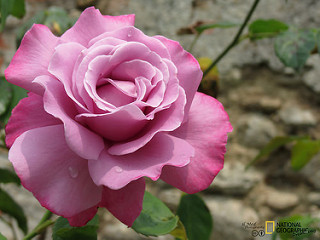

In [ ]:
PIL.Image.open(str(roses[6]))

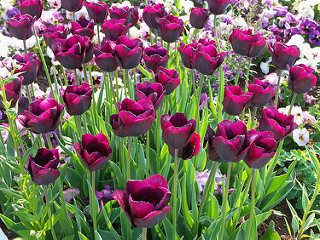

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[6]))

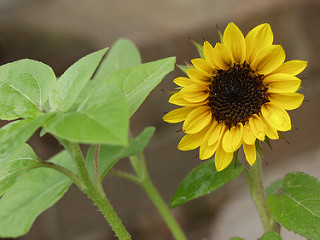

In [ ]:
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[4]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14221192676_eb8c89a7d6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg')]

In [ ]:
# open CV cannot read windows path that's we wrapper this str
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img
img.shape

(240, 320, 3)

In [ ]:
# Reshape all the images in 180 by 180
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
x = []
y = []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
y[:5]

[0, 0, 0, 0, 0]

In [ ]:
x[0]

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0, 11,  1],
        [ 3, 25,  3],
        [ 3, 29,  9],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 1, 11,  1],
        [ 1, 17,  0],
        [ 1, 20,  4],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 1,  8,  3],
        [ 0, 10,  0],
        [ 2, 15,  6],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [ ]:
# converted into numpy array
x = np.array(x)
y = np.array(y)

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
len(x_train)

2752

In [ ]:
len(x_test)

918

In [ ]:
# Normalization
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Build convolutional neural network (CNN)
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'), # 16 filters size is 3 by 3
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'), # 32 filters size is 3 by 3
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'), # 64 filters size is 3 by 3
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)                
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


model.fit(x_train, y_train, epochs=5)


Epoch 1/5
86/86 [==============================] - 79s 904ms/step - loss: 1.6056 - accuracy: 0.2340
Epoch 2/5
86/86 [==============================] - 77s 893ms/step - loss: 1.6023 - accuracy: 0.2442
Epoch 3/5
86/86 [==============================] - 77s 890ms/step - loss: 1.6030 - accuracy: 0.2442
Epoch 4/5
86/86 [==============================] - 77s 893ms/step - loss: 1.6011 - accuracy: 0.2442
Epoch 5/5
86/86 [==============================] - 77s 892ms/step - loss: 1.6015 - accuracy: 0.2442


In [ ]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 8s 265ms/step - loss: 1.6003 - accuracy: 0.2462


[1.6002622842788696, 0.24618735909461975]

In [ ]:
pred = model.predict(x_test)
pred

array([[-0.21373796, -0.16410656,  0.18471617, -0.06205697,  0.08379167],
       [-0.21373796, -0.16410656,  0.18471617, -0.06205697,  0.08379167],
       [-0.21373796, -0.16410656,  0.18471617, -0.06205697,  0.08379167],
       ...,
       [-0.21373795, -0.16410656,  0.18471617, -0.06205697,  0.08379167],
       [-0.21373795, -0.16410656,  0.18471617, -0.06205697,  0.08379167],
       [-0.21373795, -0.16410656,  0.18471617, -0.06205697,  0.08379167]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(pred[0])

In [ ]:
np.argmax(score)

2

In [ ]:
y_test[0]

1

In [ ]:
# Data Augmentation
img_height = 180
img_width = 180
data_augmentation = keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
  layers.experimental.preprocessing.RandomRotation(0.5),
  layers.experimental.preprocessing.RandomZoom(0.5),
  # layers.experimental.preprocessing.RandomContrast(0.5),
])

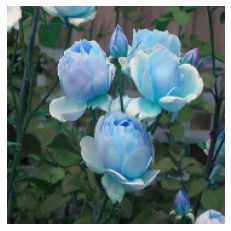

In [ ]:
plt.axis('off')
plt.imshow(x[2])

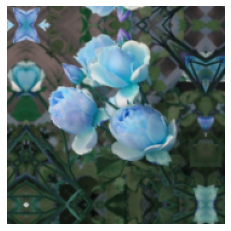

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(x)[2].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
    data_augmentation,                
    layers.Conv2D(16,3,padding='same',activation='relu'), # 16 filters size is 3 by 3
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'), # 32 filters size is 3 by 3
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'), # 64 filters size is 3 by 3
    layers.MaxPooling2D(),
    # layers.Dropout(0.2),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    # layers.Dense(num_classes) 
    layers.Dense(5, activation='softmax'),               
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


model.fit(x_train, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 95s 1s/step - loss: 1.3353 - accuracy: 0.4255
Epoch 2/5
86/86 [==============================] - 94s 1s/step - loss: 1.0994 - accuracy: 0.5451
Epoch 3/5
86/86 [==============================] - 94s 1s/step - loss: 1.0067 - accuracy: 0.6003
Epoch 4/5
86/86 [==============================] - 94s 1s/step - loss: 0.9485 - accuracy: 0.6257
Epoch 5/5
86/86 [==============================] - 98s 1s/step - loss: 0.9026 - accuracy: 0.6435


In [ ]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 8s 274ms/step - loss: 0.8928 - accuracy: 0.6656


[0.8928425908088684, 0.6655773520469666]